In [1]:
import numpy as np
import scipy.stats as stats

def bayesian_correlated_t_test(differences, rho):
    n = len(differences)
    mean_diff = np.mean(differences)
    std_diff = np.std(differences, ddof=1)
    
    # t distribution parameters
    dof = n - 1
    scale = std_diff / np.sqrt(n * (1 + (n - 1) * rho))
    
    # Retorns t distribution
    return stats.t(dof, loc=mean_diff, scale=scale)


differences = np.array([-0.0194, -0.01583, 0.001, -0.010, 0.005])  # Accuracy diferences
rho = 1 / 10  # 1/10 pq 10-fold?

posterior = bayesian_correlated_t_test(differences, rho)

# Probabilidade de um modelo ser melhor que o outro
prob_better = 1 - posterior.cdf(0)
print(f"Probabilidade de um modelo ser melhor que o outro: {prob_better:.4f}")

# Probabilidade de equivalência prática (usando uma ROPE de 1%)
rope = 0.01
prob_equiv = posterior.cdf(rope) - posterior.cdf(-rope)
print(f"Probabilidade de equivalência prática: {prob_equiv:.4f}")


Probabilidade de um modelo ser melhor que o outro: 0.0602
Probabilidade de equivalência prática: 0.6856


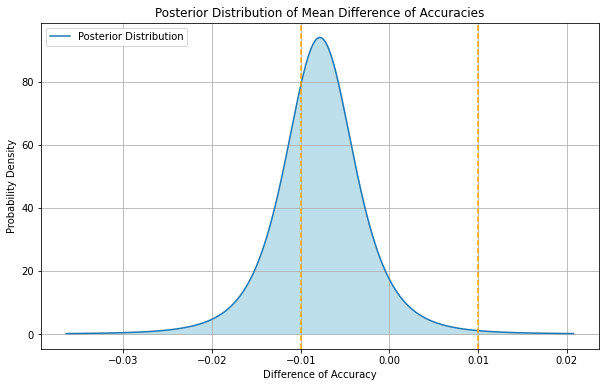

In [10]:
import matplotlib.pyplot as plt

x = np.linspace(posterior.ppf(0.001), posterior.ppf(0.999), 1000)
y = posterior.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Posterior Distribution')

# Área fora da ROPE (azul)
#plt.fill_between(x, y, where=(x < -rope) | (x > rope), color='blue', alpha=0.3, label='Outside ROPE')
plt.fill_between(x, y, color='lightblue', alpha=0.8)
# Área da ROPE (laranja)
#plt.fill_between(x, y, where=(x >= -rope) & (x <= rope), color='orange', alpha=0.5, label='ROPE')

# Adicionando linhas verticais na ROPE
plt.axvline(-rope, color='orange', linestyle='--')
plt.axvline(rope, color='orange', linestyle='--')

plt.title('Posterior Distribution of Mean Difference of Accuracies')
plt.xlabel('Difference of Accuracy')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()